In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="SimHei.ttf", size=14)

In [2]:
df = pd.read_csv('不同交易者的4个阶段.csv')
df.set_index('交易日期', drop=True, inplace=True)
df

,小单主动买入占比,中单主动买入占比,大单主动买入占比,小单买入额(万元),中单买入额(万元),大单买入额(万元),SSE close,ema_12_sm,ema_26_sm,ema_12_md,...,知情交易者交易活跃度,趋势追踪者交易活跃度,跟随交易者交易活跃度,知情交易者交易活跃度_change,趋势追踪者交易活跃度_change,跟随交易者交易活跃度_change,SSE_change,知情交易者交易活跃度_stage,趋势追踪者交易活跃度_stage,跟随交易者交易活跃度_stage
交易日期,,,,,,,,,,,,,,,,,,,,,
2018-01-04,0.548591,0.282573,0.168835,27343720.53,14084449.80,8415353.23,3385.7102,2.474974e+07,2.412746e+07,1.344130e+07,...,21.298465,73.188506,185.380979,-0.044257,0.227397,0.522994,0.004928,2,1,1
2018-01-05,0.547981,0.280421,0.171598,27459246.32,14051870.36,8598775.36,3391.7501,2.516659e+07,2.437426e+07,1.353524e+07,...,24.629847,82.145273,235.661245,0.156414,0.122379,0.271227,0.001784,1,1,1
2018-01-08,0.528783,0.288975,0.182242,29666323.54,16212407.20,10224321.12,3409.4795,2.585886e+07,2.476626e+07,1.394711e+07,...,65.412677,139.278553,324.265373,1.655830,0.695515,0.375981,0.005227,1,1,1
2018-01-09,0.553267,0.283965,0.162767,26807715.42,13759111.36,7886647.01,3413.8996,2.600483e+07,2.491748e+07,1.391819e+07,...,41.232774,124.258511,322.056375,-0.369652,-0.107842,-0.006812,0.001296,2,2,2
2018-01-10,0.552708,0.278836,0.168456,28627604.92,14442358.42,8725212.68,3421.8343,2.640834e+07,2.519231e+07,1.399883e+07,...,41.648845,127.174918,359.423024,0.010091,0.023470,0.116025,0.002324,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,0.659467,0.239392,0.101142,75146029.73,27278627.30,11525072.61,3251.3971,6.570493e+07,6.301307e+07,2.259456e+07,...,272.682620,490.140915,825.249912,0.216287,0.280019,0.384135,-0.004366,1,1,1
2023-03-28,0.684170,0.226681,0.089149,68678451.13,22754686.58,8949003.23,3245.3760,6.616239e+07,6.343273e+07,2.261920e+07,...,244.653429,458.106484,837.491994,-0.102791,-0.065358,0.014834,-0.001852,2,2,1
2023-03-29,0.675374,0.229773,0.094854,66238822.31,22535476.30,9302993.22,3240.0568,6.617415e+07,6.364059e+07,2.260632e+07,...,228.610742,422.507974,778.033900,-0.065573,-0.077708,-0.070995,-0.001639,2,2,2


In [3]:
def pos(x):
    if (x['知情交易者交易活跃度_stage'] == 1) | (x['知情交易者交易活跃度_stage'] == 2):
        return 1
    elif (x['知情交易者交易活跃度_stage'] == 3) | (x['知情交易者交易活跃度_stage'] == 4):
        return 0

df['pos'] = df.apply(pos, axis=1)

In [4]:
# 做一个1天的交易信号的滞后，在信号发出的第二天进行交易
df['pos'] = df['pos'].shift()
df = df.dropna()

In [5]:
df['yield'] = df['SSE_change'] * df['pos']
df['yield'] = df['yield'] + 1

/tmp/ipykernel_456/1114611788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yield'] = df['SSE_change'] * df['pos']
/tmp/ipykernel_456/1114611788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yield'] = df['yield'] + 1


知情交易者策略收益： 1.2639680619094202


Text(0.5, 1.0, '知情交易者策略净值曲线')

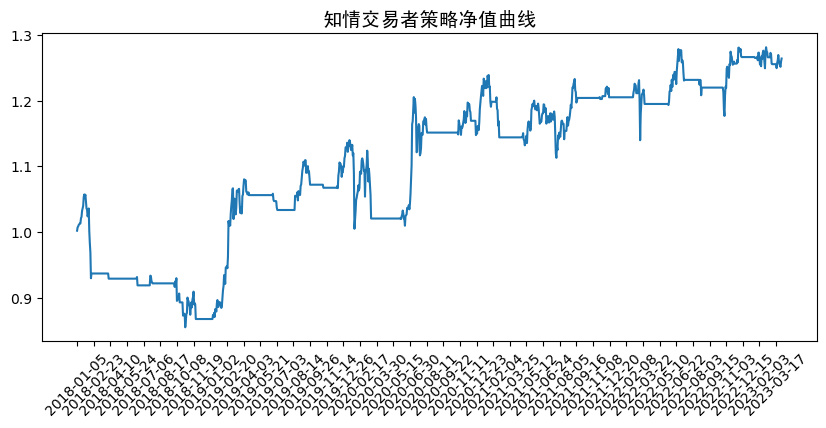

In [6]:
print('知情交易者策略收益：', float(np.cumprod(df['yield'])[-1:]))
plt.figure(figsize=(10, 4))
plt.plot(np.cumprod(df['yield']))
plt.xticks(df['yield'].index[::30], rotation=45)
plt.title('知情交易者策略净值曲线', fontproperties=font)

2018知情交易者策略收益： 0.8673157960358627


Text(0.5, 1.0, '知情交易者策略净值曲线')

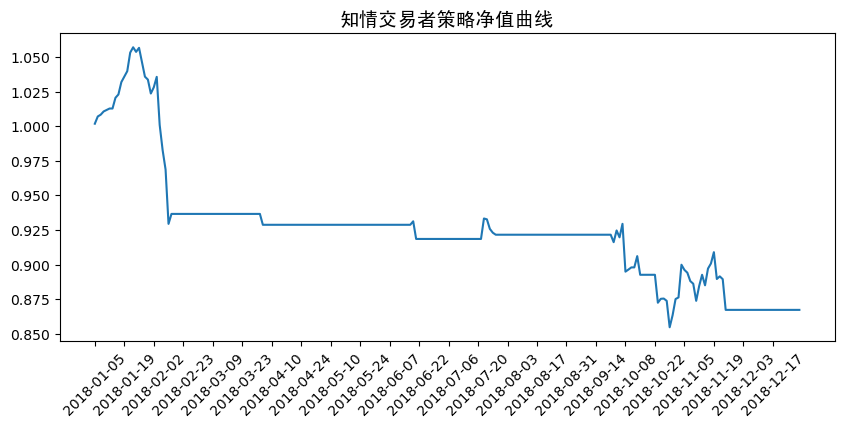

In [7]:
period_df = df.loc['2018-01-01':'2018-12-31', :]
print('2018知情交易者策略收益：', float(np.cumprod(period_df['yield'])[-1:]))
plt.figure(figsize=(10, 4))
plt.plot(np.cumprod(period_df['yield']))
plt.xticks(period_df['yield'].index[::10], rotation=45)
plt.title('知情交易者策略净值曲线', fontproperties=font)

2019知情交易者策略收益： 1.286464283132405


Text(0.5, 1.0, '知情交易者策略净值曲线')

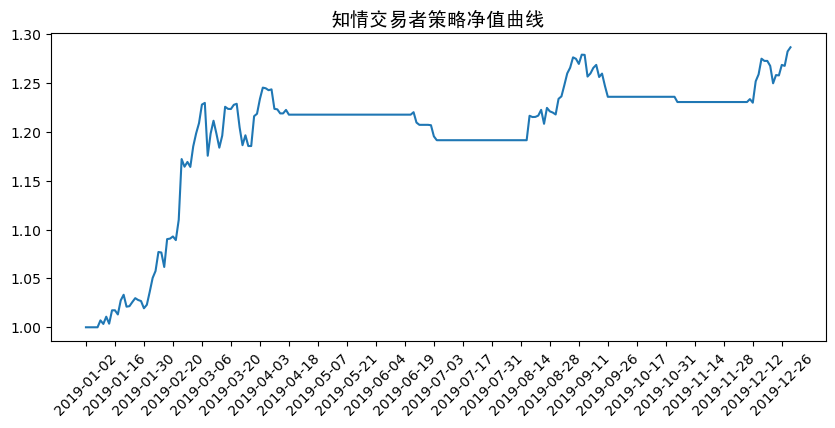

In [8]:
period_df = df.loc['2019-01-01':'2019-12-31', :]
print('2019知情交易者策略收益：', float(np.cumprod(period_df['yield'])[-1:]))
plt.figure(figsize=(10, 4))
plt.plot(np.cumprod(period_df['yield']))
plt.xticks(period_df['yield'].index[::10], rotation=45)
plt.title('知情交易者策略净值曲线', fontproperties=font)

2020知情交易者策略收益： 1.0639264420673853


Text(0.5, 1.0, '知情交易者策略净值曲线')

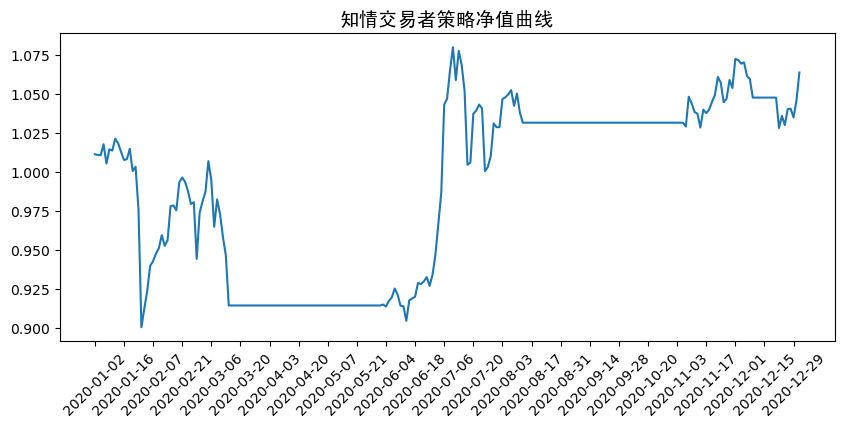

In [9]:
period_df = df.loc['2020-01-01':'2020-12-31', :]
print('2020知情交易者策略收益：', float(np.cumprod(period_df['yield'])[-1:]))
plt.figure(figsize=(10, 4))
plt.plot(np.cumprod(period_df['yield']))
plt.xticks(period_df['yield'].index[::10], rotation=45)
plt.title('知情交易者策略净值曲线', fontproperties=font)

2021知情交易者策略收益： 1.01504604134597


Text(0.5, 1.0, '知情交易者策略净值曲线')

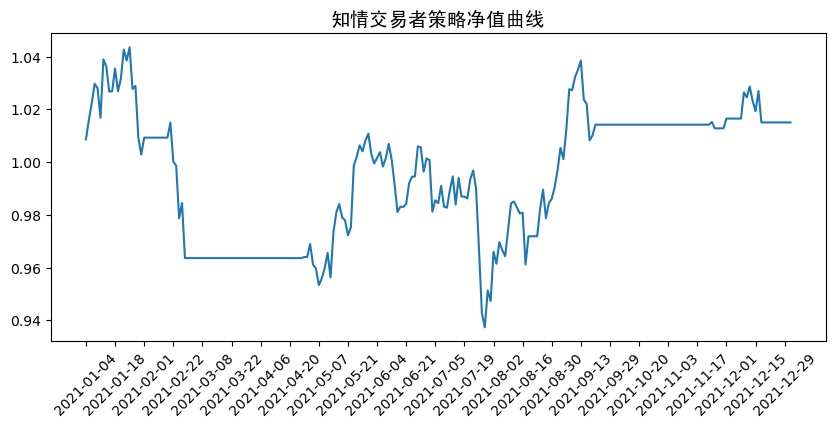

In [10]:
period_df = df.loc['2021-01-01':'2021-12-31', :]
print('2021知情交易者策略收益：', float(np.cumprod(period_df['yield'])[-1:]))
plt.figure(figsize=(10, 4))
plt.plot(np.cumprod(period_df['yield']))
plt.xticks(period_df['yield'].index[::10], rotation=45)
plt.title('知情交易者策略净值曲线', fontproperties=font)

2022知情交易者策略收益： 1.0507988888943252


Text(0.5, 1.0, '知情交易者策略净值曲线')

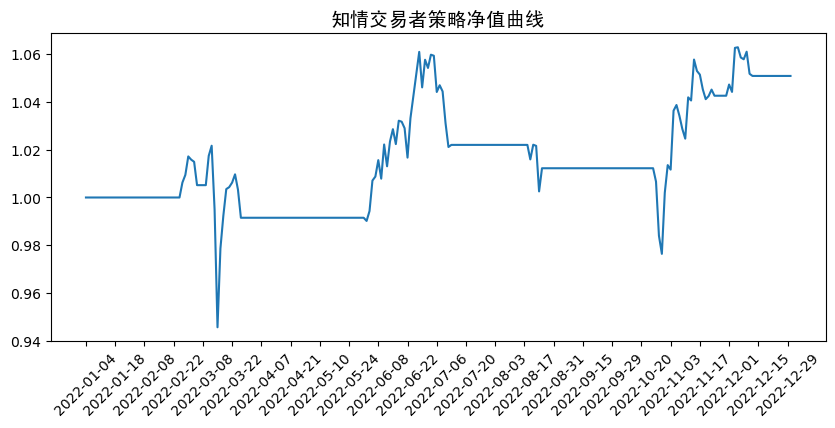

In [11]:
period_df = df.loc['2022-01-01':'2022-12-31', :]
print('2022知情交易者策略收益：', float(np.cumprod(period_df['yield'])[-1:]))
plt.figure(figsize=(10, 4))
plt.plot(np.cumprod(period_df['yield']))
plt.xticks(period_df['yield'].index[::10], rotation=45)
plt.title('知情交易者策略净值曲线', fontproperties=font)

2023知情交易者策略收益： 0.9982611315827934


Text(0.5, 1.0, '知情交易者策略净值曲线')

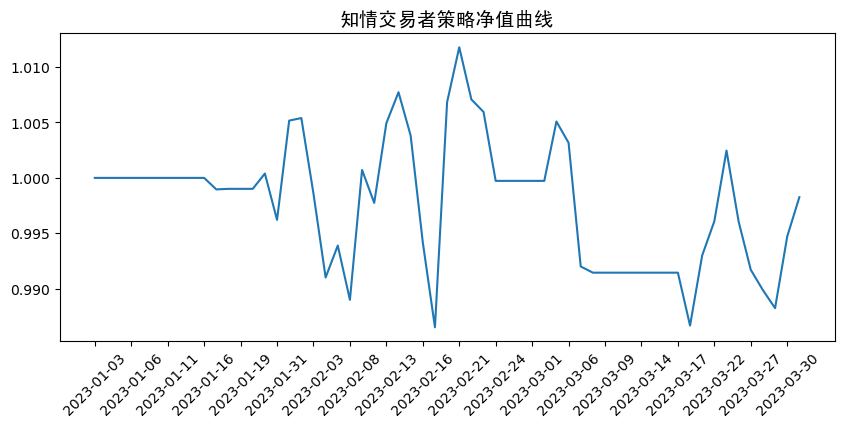

In [12]:
period_df = df.loc['2023-01-01':'2023-12-31', :]
print('2023知情交易者策略收益：', float(np.cumprod(period_df['yield'])[-1:]))
plt.figure(figsize=(10, 4))
plt.plot(np.cumprod(period_df['yield']))
plt.xticks(period_df['yield'].index[::3], rotation=45)
plt.title('知情交易者策略净值曲线', fontproperties=font)